In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())

True
True


list of physical devices

In [ ]:
d=tf.config.list_physical_devices()
for device in d:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
print(tf.config.list_physical_devices('CPU'))
print(tf.test.gpu_device_name())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
/device:GPU:0


make tensor

In [ ]:
x=tf.constant(10)
print(x.device)
print(x)
print(x.numpy())   #for check the value of tensor flow
print(x.shape)      #where 

/job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(10, shape=(), dtype=int32)
10
()


tensor is a data structure ,it has shape () empty
,(10,0) vector 
(10,20) matrix

In [ ]:
y=tf.zeros((10,5))
print(y.device)
print(y.numpy())
print(y.shape)

/job:localhost/replica:0/task:0/device:GPU:0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(10, 5)


similirly with variables

In [ ]:
x=tf.Variable(10)
print(x.device)
print(x)
print(x.numpy())
x=tf.Variable(tf.zeros(10))
print(x.device)

/job:localhost/replica:0/task:0/device:CPU:0
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>
10
/job:localhost/replica:0/task:0/device:GPU:0


debugging mode on

In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a=tf.constant([[1.,2,3],[4,5,6]])
b=tf.constant([[1.,2],[2,3],[4,5]])
c=tf.matmul(a,b)
d=tf.Variable(10)
e=d+10

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


EagerConst 

In [ ]:
print(c)

tf.Tensor(
[[17. 23.]
 [38. 53.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a=tf.constant(10)
b=tf.constant(20)
c=tf.constant(30)
z=a+b+c
print(z.numpy())

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
60


creating graph

In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
def sum_t(a,b,c):
    z=a+b+c
    return z
graph=tf.function(sum_t)
a=tf.constant(10)
b=tf.constant(20)
c=tf.constant(30)
print(graph(a,b,c).numpy())

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_sum_t_12 in device /job:localhost/replica:0/task:0/device:GPU:0
60


In [ ]:
def merge(A,p,q,r):
    n1=q-p+1
    n2=r-q
    L=[0]*(n1)
    R=[0]*(n2)
    for i in range(n1):
        L[i]=A[p+i]
    for j in range(n2):
        R[i]=A[q+j+1]
    
    
    i=0
    j=0
    k=p
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
        k += 1
            
    while i < n1:
        A[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        A[k] = R[j]
        j += 1
        k += 1
            

def merge_sort(A,p,r):
    if p<r:
        
        q=(p+(r-1))//2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    

    
            
A=[5,4,3,2,1]
p=0
r=len(A)-1
merge_sort(A,p,r)
print(A)

    
        

[0, 3, 0, 4, 5]


In [ ]:
import tensorflow as tf
x=tf.constant([[1,3],[2,1]])
print(x)
print(x.shape)
print(x.dtype)
print(x.numpy())
print(tf.rank(x).numpy())
print(tf.add(x,10))
print(tf.multiply(x,10))
print(x*10)
print(x**3)

tf.Tensor(
[[1 3]
 [2 1]], shape=(2, 2), dtype=int32)
(2, 2)
<dtype: 'int32'>
[[1 3]
 [2 1]]
2
tf.Tensor(
[[11 13]
 [12 11]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[10 30]
 [20 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[10 30]
 [20 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 1 27]
 [ 8  1]], shape=(2, 2), dtype=int32)


In [ ]:
a=tf.constant([[1,2],[3,4]])
b=tf.constant([[3,4],[1,2]])
print(a*b)
print(tf.multiply(a,b))
#matrix multiplication dot product
print(tf.matmul(a,b))
print(a@b)

tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)


In [ ]:
#special matrix
x=tf.zeros((2,2))
y=tf.ones((2,2))
z=tf.eye(2)
print(x)
print(y)
print(z)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf
z=tf.ones((2,3,4,5))

print(tf.rank(z).numpy())
print(z.shape)
print(z.dtype)
print(z.ndim)
print(tf.size(z).numpy())
###############################expand dims
z1=tf.expand_dims(z,axis=0)
print(z1.shape)

####################reduce dims
z2=tf.squeeze(z1,axis=0)
print(z2.shape)

4
(2, 3, 4, 5)
<dtype: 'float32'>
4
120
(1, 2, 3, 4, 5)
(2, 3, 4, 5)


In [ ]:
#RESHAPE AND RESIZE
import numpy as np
x=np.array([[2,3,4,5,6,7],[0,0,1,2,3,4]])
print(x.shape)
y=np.reshape(x,(4,3))
print(y)
z=np.resize(x,(2,30))
print(z)


(2, 6)
[[2 3 4]
 [5 6 7]
 [0 0 1]
 [2 3 4]]
[[2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7]
 [0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4]]


In [ ]:
x=tf.random.uniform((5,5))
print(x.numpy())
x=tf.random.normal((5,5))
print(x.numpy())
print(x.device)

[[0.5991554  0.37781513 0.5604727  0.3616842  0.8381207 ]
 [0.52383196 0.73754096 0.7127489  0.3328439  0.6897923 ]
 [0.16674066 0.8373488  0.68553054 0.276744   0.065593  ]
 [0.9805403  0.05658615 0.19116569 0.90526164 0.20667803]
 [0.7621666  0.87516785 0.9033228  0.79402256 0.3339883 ]]
[[ 0.6771832   1.4691896  -0.31413624  0.16974914 -0.49707055]
 [ 0.11137953  0.22818123 -0.96477526 -0.05828717  0.06781179]
 [-0.36713207  0.36549458  1.3350843   1.31784     0.7055536 ]
 [ 1.4686025   0.61567265  1.1449784  -1.0196801   0.03238351]
 [-1.1178088  -0.91558397 -0.61197186 -0.70358026  0.99985963]]
/job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
z=tf.random.uniform((3,3))
print(z.numpy())
print(tf.reduce_max(z).numpy())
print(tf.reduce_max(z,axis=0))  #column wise
print(tf.argmax(z))
print(tf.argmin(z))
print(tf.reduce_sum(z))
print(tf.reduce_min(z).numpy())
print(tf.reduce_max(z).numpy())
print(tf.square(z))


[[0.42126966 0.6721033  0.08740389]
 [0.79513776 0.16590548 0.51472235]
 [0.8483776  0.9878596  0.773157  ]]
0.9878596
tf.Tensor([0.8483776 0.9878596 0.773157 ], shape=(3,), dtype=float32)
tf.Tensor([2 2 2], shape=(3,), dtype=int64)
tf.Tensor([0 1 0], shape=(3,), dtype=int64)
tf.Tensor(5.265937, shape=(), dtype=float32)
0.08740389
0.9878596
tf.Tensor(
[[0.17746812 0.45172283 0.00763944]
 [0.63224405 0.02752463 0.2649391 ]
 [0.7197445  0.9758666  0.59777176]], shape=(3, 3), dtype=float32)


In [ ]:
###############3 NN Activation
z=tf.random.uniform((3,3))
print(tf.nn.softmax(z))
print(tf.nn.sigmoid(z))
print(tf.nn.relu(z))

tf.Tensor(
[[0.28919718 0.34530124 0.36550158]
 [0.35606766 0.3596233  0.284309  ]
 [0.41561362 0.30260056 0.28178582]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.67359674 0.7113206  0.72285336]
 [0.7239885  0.7259696  0.676837  ]
 [0.7127624  0.64370835 0.62720156]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.72449803 0.9018065  0.9586599 ]
 [0.96433294 0.9742693  0.7392738 ]
 [0.90883875 0.59149635 0.52023005]], shape=(3, 3), dtype=float32)


In [ ]:
z=tf.constant([[1,2,3],[3,4,5],[5,6,7]])
print(z[:,1].numpy())
print(z[2,:].numpy())
print(z[:,0:2].numpy())

[2 4 6]
[5 6 7]
[[1 2]
 [3 4]
 [5 6]]


In [ ]:
z=[[1,2,3,4],[2,3],[1],[1,2,3]]
print(z)
x=tf.ragged.constant(z)
print(x)

[[1, 2, 3, 4], [2, 3], [1], [1, 2, 3]]
<tf.RaggedTensor [[1, 2, 3, 4], [2, 3], [1], [1, 2, 3]]>


In [ ]:
z=tf.sparse.SparseTensor(indices=[[1,1],[3,9]],values=[1,1],dense_shape=[10,10])
print(z)
print(tf.sparse.to_dense(z))

SparseTensor(indices=tf.Tensor(
[[1 1]
 [3 9]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 1], shape=(2,), dtype=int32), dense_shape=tf.Tensor([10 10], shape=(2,), dtype=int64))
tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]], shape=(10, 10), dtype=int32)


In [ ]:
##########string
import tensorflow as tf
z=tf.constant('Abc Defgh ijkl')
print(z)
z1=tf.strings.split(z,sep=' ')
print(z1)
z2=tf.strings.join(z1,separator=' ')
print(z2)

In [ ]:
import tensorflow as tf
z=tf.constant('Abc Defgh ijkl')
print(z)

tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)


In [ ]:
z1=tf.strings.split(z,sep=' ')
print(z1)

tf.Tensor([b'Abc' b'Defgh' b'ijkl'], shape=(3,), dtype=string)


In [ ]:
z2=tf.strings.join(z1,separator=' ')
print(z2)

tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)


In [ ]:
a=tf.constant(['abc','def ghi','manjeet singht man','pareshi goel'])
print(a)
b=tf.strings.split(a,sep=' ')   #Ragged tensor
print(b)
print(tf.strings.length(b))

tf.Tensor([b'abc' b'def ghi' b'manjeet singht man' b'pareshi goel'], shape=(4,), dtype=string)
<tf.RaggedTensor [[b'abc'], [b'def', b'ghi'], [b'manjeet', b'singht', b'man'],
 [b'pareshi', b'goel']]>
<tf.RaggedTensor [[3], [3, 3], [7, 6, 3], [7, 4]]>


In [ ]:
test=tf.constant('10 20 30 40 50 60 70 80')
a=tf.strings.to_number(tf.strings.split(test,sep=' '))
print(a)
print(tf.reduce_sum(a))

tf.Tensor([10. 20. 30. 40. 50. 60. 70. 80.], shape=(8,), dtype=float32)
tf.Tensor(360.0, shape=(), dtype=float32)


In [ ]:
b=tf.constant('abc def ghijkl')
print(tf.strings.length(b))
c=tf.strings.split()

In [ ]:
print(tf.strings.regex_replace("Text with tags.<br /><b>contains html</b>","<[^>]+>"," "))

tf.Tensor(b'Text with tags.  contains html ', shape=(), dtype=string)


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a=tf.Variable([3+2j,5-6j])
print(a.device)
print(a.shape)
print(a.dtype)
print(a.numpy())
print(a)
print(tf.convert_to_tensor(a))

/job:localhost/replica:0/task:0/device:GPU:0
(2,)
<dtype: 'complex128'>
[3.+2.j 5.-6.j]
<tf.Variable 'Variable:0' shape=(2,) dtype=complex128, numpy=array([3.+2.j, 5.-6.j])>
tf.Tensor([3.+2.j 5.-6.j], shape=(2,), dtype=complex128)


In [ ]:
x=30
y=30
print(x==y)
print(id(x)==id(y))

#### tensorflow
a=tf.Variable(30)
b=tf.Variable(30)
print(a==b)
print(id(a)==id(b))

True
True
tf.Tensor(True, shape=(), dtype=bool)
False


WAP to implement linear model/ linear regression using tensorflow.
Y=W*

Y=W*X+B Weight updation rule: Delta/Window hoff Rule/ SGD new W=OLD W- learning rate*dervative of cost w.r.t W Cost=MSE= mean(square(target-output))

In [ ]:
import tensorflow as tf
class Model(object):
  def __init__(self):
    self.w=tf.Variable(5.0)   #W=5
    self.b=tf.Variable(10.0)   #B=10

  def __call__(self,x):
    return self.w*x+self.b

model=Model()
y=model(3)
print(y.numpy())

25.0


In [ ]:
def loss(target_y, predected_y):
  return tf.reduce_mean(tf.square(target_y-predected_y))

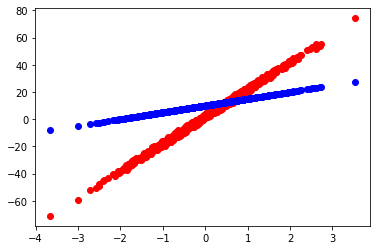

loss=  279.84097


In [ ]:
num_samples=1000
inputs=tf.random.normal(shape=[num_samples])
noise=tf.random.normal(shape=[num_samples])
true_w=20
true_b=2
target=true_w*inputs+true_b+noise

#######################################

import matplotlib.pyplot as plt
plt.scatter(inputs,target,c='r')
plt.scatter(inputs,model(inputs),c='b')
plt.show()
print('loss= ', loss(target,model(inputs)).numpy())

In [ ]:
def train(model,inputs,target,learning_rate):
  with tf.GradientTape() as T:                  
    current_loss=loss(target,model(inputs))
  dw,db=T.gradient(current_loss,[model.w,model.b])
  model.w.assign_sub(learning_rate*dw) # model.w= model.w- lr*dw
  model.b.assign_sub(learning_rate*db)

In [ ]:
model=Model()
ws,bs=[],[]
epochs=range(500)
for epoch in epochs:
  ws.append(model.w.numpy())
  bs.append(model.b.numpy())
  current_loss=loss(target,model(inputs))
  train(model,inputs,target,learning_rate=0.01)
  print("Epoch=%d,W=%f,b=%f,loss=%f"%(epoch,ws[-1],bs[-1],current_loss))

Epoch=0,W=5.000000,b=10.000000,loss=279.840973
Epoch=1,W=5.290275,b=9.847230,loss=269.184967
Epoch=2,W=5.574931,b=9.697374,loss=258.936218
Epoch=3,W=5.854076,b=9.550377,loss=249.079224
Epoch=4,W=6.127819,b=9.406183,loss=239.598862
Epoch=5,W=6.396263,b=9.264740,loss=230.480881
Epoch=6,W=6.659510,b=9.125995,loss=221.711349
Epoch=7,W=6.917662,b=8.989896,loss=213.276962
Epoch=8,W=7.170817,b=8.856393,loss=205.164917
Epoch=9,W=7.419072,b=8.725436,loss=197.362930
Epoch=10,W=7.662522,b=8.596978,loss=189.859100
Epoch=11,W=7.901259,b=8.470970,loss=182.642059
Epoch=12,W=8.135376,b=8.347366,loss=175.700821
Epoch=13,W=8.364961,b=8.226120,loss=169.024902
Epoch=14,W=8.590101,b=8.107187,loss=162.604095
Epoch=15,W=8.810884,b=7.990523,loss=156.428665
Epoch=16,W=9.027394,b=7.876084,loss=150.489288
Epoch=17,W=9.239714,b=7.763829,loss=144.776855
Epoch=18,W=9.447923,b=7.653715,loss=139.282761
Epoch=19,W=9.652102,b=7.545702,loss=133.998627
Epoch=20,W=9.852330,b=7.439750,loss=128.916443
Epoch=21,W=10.048682,b

<function matplotlib.pyplot.show(*args, **kw)>

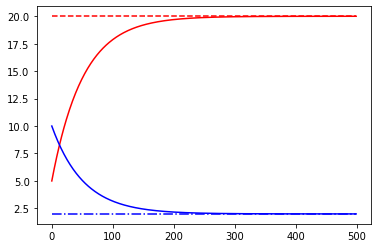

In [ ]:
plt.plot(epochs,ws,'r',epochs,bs,'b')
plt.plot([true_w]*len(epochs),'r--',[true_b]*len(epochs),'b-.')
plt.show

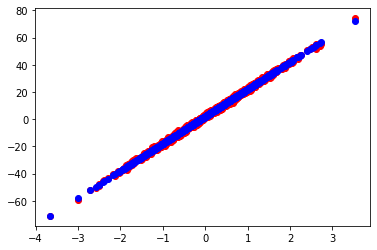

loss=  1.013686


In [ ]:
plt.scatter(inputs,target,c='r')
plt.scatter(inputs,model(inputs),c='b')
plt.show()
print('loss= ',loss(target,model(inputs)).numpy())

ACTIVATION FUNCTION


Logistic=sigmoid=1/(1+exp(-x))Linear=f(x)=x tanhyperbolic=tanh(x) sigmoid=1/(!+np.exp(-x))relu f(x)=max(0,x)=if x<0 then 0 else x threshold: f(x)=0 if x<=0 else 1 softmax

In [ ]:
#SOFTMAX ACTIVATION FUNCTION
x = tf.constant([1,2,3,4],dtype=tf.float32)
y = tf.nn.softmax(x)
print(x.numpy())
print(y.numpy())
print(tf.reduce_sum(y).numpy())
print(tf.argmax(y).numpy())

[1. 2. 3. 4.]
[0.0320586  0.08714432 0.23688284 0.6439142 ]
0.99999994
3


In [ ]:
#1ST SEQUENTIAL MODEL DARECT INPUT
import 